In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!unzip '/content/drive/My Drive/Data/Modeling for Research Articles (NLP)/train_tGmol3O.zip'

Archive:  /content/drive/My Drive/Data/Modeling for Research Articles (NLP)/train_tGmol3O.zip
  inflating: train.csv               


In [3]:
!unzip '/content/drive/My Drive/Data/Modeling for Research Articles (NLP)/test_8iecVfC.zip'

Archive:  /content/drive/My Drive/Data/Modeling for Research Articles (NLP)/test_8iecVfC.zip
  inflating: test.csv                


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data Preprocessing

In [5]:
train = pd.read_csv('/content/train.csv')

In [6]:
er_1 = '\n'
TITLE = []
t = 0
ABSTRACT = []
a = 0
for i in range(len(train)):
  if er_1 in train.iloc[i,1]:
    t = t+1
  if er_1 in train.iloc[i,2]:
    a = a+1
  TITLE.append(train.iloc[i,1].replace(er_1, ' ')) 
  ABSTRACT.append(train.iloc[i,2].replace(er_1, ' ')) 



In [7]:
train['ABSTRACT'] = ABSTRACT
train['TITLE'] = TITLE

In [8]:
train.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [9]:
#Remove the expression given in between $......$
title = []
abstract = []
for i in range(len(train)):
  b = train.iloc[i,1]
  c = train.iloc[i,2]
  while b.find('$') != -1:
    n_1 = b.find('$')
    n_2 = b[n_1+1:].find('$')
    er_2 = b[n_1:n_1+n_2+2]
    b = b.replace(er_2,'')
  title.append(b)
  
  while c.find('$') != -1:
    n_1 = c.find('$')
    n_2 = c[n_1+1:].find('$')
    er_2 = c[n_1:n_1+n_2+2]
    c = c.replace(er_2,'')
  abstract.append(c)


In [10]:
train['TITLE']=title
train['ABSTRACT'] = abstract
train.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [11]:
train.to_csv('train1.csv')

In [12]:
train = pd.read_csv('/content/drive/My Drive/Data/train1.csv')
train.head()

,Unnamed: 0,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [13]:
del train['Unnamed: 0']
train.head(2)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0


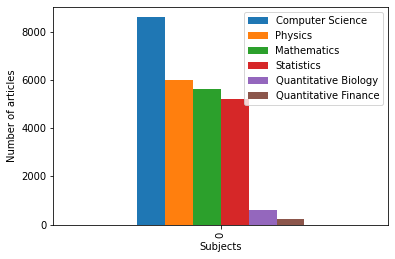

In [14]:
columns = train.columns
columns = columns[3:]

counts_0 = [train[i].value_counts()[0] for i in columns ]
counts_1 = [train[i].value_counts()[1] for i in columns ]

counts_0 = np.asarray(counts_0).reshape(1,6)
counts_1 = np.asarray(counts_1).reshape(1,6)

pd.DataFrame(counts_1, columns = columns).plot(kind = 'bar')
plt.xlabel('Subjects')
plt.ylabel('Number of articles')
plt.show()

In [15]:
pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.47.0-cp36-none-any.whl size=17289 sha256=5c91470a2f5fdf6f9bab764abb2905ea07f215b87c85377eb4d22668a6d8b0c5
  Stored in directory: /root/.cache/pip/wheels/70/87/01/76c703d5401b65e323927c1fdc665f3fb143282ff67d71e859
Successfully built keras-self-attention


In [16]:
# install required libearies
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, save_model, Model
from keras.layers import Dense, Flatten, Input, LSTM, Activation, Dropout,concatenate, Conv2D, Conv3D, BatchNormalization, Bidirectional, Attention, TimeDistributed, Conv1D
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.optimizers import Adam, SGD
from keras.regularizers import l1_l2
import csv
from keras_self_attention import SeqSelfAttention

In [17]:
maxLen = len(max(train['TITLE'], key = len).split())
print(maxLen)

36


In [18]:
maxLen = len(max(train['ABSTRACT'], key = len).split())
print('maximum length of sentence',maxLen)

maximum length of sentence 449


In [19]:
y = train[columns]
y.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,0,0,1,0,0


In [20]:
cal = ['Computer_Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative_Biology', 'Quantitative_Finance']
y.columns = cal
y.head()

,Computer_Science,Physics,Mathematics,Statistics,Quantitative_Biology,Quantitative_Finance
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,0,0,1,0,0


#Train-Test split
Here I have to split the data in the different way because in the data, "Quantitative Biology" and "Quantitative_Finance" have the less number of articles

In [21]:
Qunt_f = y.query("Quantitative_Finance == 1").index.values
Qunt_f = list(Qunt_f)
len(Qunt_f)

249

In [22]:
Qunt_b = []
for i in range(len(train)):
  if y['Quantitative_Biology'][i] == 1 and i not in Qunt_f:
    Qunt_b.append(i)
len(Qunt_b)

583

In [23]:
rest_index = [i for i in range(len(train)) if i not in list(Qunt_f) + list(Qunt_b)]
len(rest_index)

20140

In [24]:
train_1 = Qunt_f[0:200]
test_1 = Qunt_f[200:]

train_2 = Qunt_b[0:465]
test_2 = Qunt_b[465:]

train_3 = rest_index[0:15110]
test_3 = rest_index[15110:]

train_index = train_1 + train_2 + train_3
test_index = test_1 + test_2 + test_3
train_index = sorted(train_index)
test_index = sorted(test_index)
print('length of train ',len(train_index))
print('length of test ',len(test_index))
print('Total length ',len(train_index + test_index))

length of train  15775
length of test  5197
Total length  20972


In [25]:
x_train = []
for i in train_index:
  x_train.append(train.iloc[i,1:3])
x_train = pd.DataFrame(x_train)
print('Length ',len(x_train))
x_train.head()

Length  15775


,TITLE,ABSTRACT
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...


In [26]:
x_test = []
for i in test_index:
  x_test.append(train.iloc[i, 1:3])
x_test = pd.DataFrame(x_test)
print('Length',len(x_test))
x_test.head()

Length 5197


,TITLE,ABSTRACT
15755,Rota-Baxter modules toward derived functors,In this paper we study Rota-Baxter modules w...
15756,Video Pandemics: Worldwide Viral Spreading of ...,Viral videos can reach global penetration tr...
15757,Orthogonal foliations on riemannian manifolds,"In this work, we find an equation that relat..."
15758,Mapping Objects to Persistent Predicates,The Logic Programming through Prolog has bee...
15759,Efficient modified Jacobi-Bernstein basis tran...,"In the paper, we show that the transformatio..."


In [27]:
y_train = []
for i in train_index:
  y_train.append(y.iloc[i,:])
y_train = pd.DataFrame(y_train)
print('Length ',len(y_train))
y_train.head()

Length  15775


,Computer_Science,Physics,Mathematics,Statistics,Quantitative_Biology,Quantitative_Finance
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,0,0,1,0,0


In [28]:
x_train.shape,y_train.shape

((15775, 2), (15775, 6))

In [29]:
y_test = []
for i in test_index:
  y_test.append(y.iloc[i,:])
y_test = pd.DataFrame(y_test)
print('Length ',len(y_test))
y_test.head()

Length  5197


,Computer_Science,Physics,Mathematics,Statistics,Quantitative_Biology,Quantitative_Finance
15755,0,0,1,0,0,0
15756,1,0,0,0,0,0
15757,0,0,1,0,0,0
15758,1,0,0,0,0,0
15759,0,0,1,0,0,0


In [30]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b
a = np.asarray([[1, 1], [2, 2], [3, 3]])
b = np.asarray([1, 2, 3])
shuffle_in_unison(a, b)

(array([[1, 1],
        [2, 2],
        [3, 3]]), array([1, 2, 3]))

In [31]:
x_train, y_train = shuffle_in_unison(np.array(x_train), np.array(y_train))

In [32]:
x_test, y_test = shuffle_in_unison(np.array(x_test), np.array(y_test))

In [33]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15775, 2), (15775, 6), (5197, 2), (5197, 6))

#Word Embedding

In [34]:
x_train = x_train.T
x_train.shape

(2, 15775)

In [35]:
x_test = x_test.T
x_test.shape

(2, 5197)

In [36]:
x = list(x_train[0]) + list(x_train[1]) + list(x_test[0]) + list(x_test[1])
print(len(x))

41944


In [37]:
!unzip '/content/drive/My Drive/Data/glove.6B (1).zip'

Archive:  /content/drive/My Drive/Data/glove.6B (1).zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [38]:
embeddings_index = dict()
f = open('/content/glove.6B.50d.txt', encoding='utf8')

for line in f:
  values = line.strip().split()
  word = values[0]
  coef = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coef 
f.close()

print(len(embeddings_index))

400000


In [39]:
vocab_size = len(embeddings_index)+1
print(vocab_size)
t = Tokenizer(vocab_size)
t.fit_on_texts(x)
print('len word index',len(t.word_index))
#print(t.word_index)

encoded_docs = t.texts_to_sequences(x)
print('encoded_docs', encoded_docs[0:10])

400001
len word index 57481
encoded_docs [[62, 3346, 8956, 3, 1281, 6911, 6, 79, 143, 4, 62, 708, 238, 46], [4, 1059, 2493, 244, 101], [23, 371, 2, 1705, 289, 8, 85, 1191, 13825], [476, 2416, 1529, 174, 1082, 63, 6, 1, 7307, 3885, 16065, 3, 14815], [1068, 42, 6, 59, 766], [180, 99, 8, 9507, 10509, 5424], [125, 143, 2, 4, 1913, 245, 1945, 6, 4, 31, 446, 1309, 62, 3443, 729], [1, 296, 165, 43, 1, 8957, 3, 1037, 2701, 9, 7750, 11, 698, 2370, 2531], [516, 4515, 389, 6, 9787, 25, 934, 739, 2293, 14, 2769, 607, 3702, 1476], [10136, 78, 4989, 4207, 214, 19797, 22873]]


In [40]:
padded_docs = pad_sequences(encoded_docs, maxlen= 449, padding = 'post')
print('padded_docs shape', padded_docs.shape)

padded_docs shape (41944, 449)


In [41]:
x_train_1 = padded_docs[:15775,:]
x_train_2 = padded_docs[15775:15775+15775 ,:]

x_test_1 = padded_docs[15775+15775: 15775+15775+5197, :]
x_test_2 = padded_docs[15775+15775+5197:, :]

print('X_train_1',x_train_1.shape)
print('x_train_2',x_train_2.shape)
print('x_test_1', x_test_1.shape)
print('x_test_2',x_test_2.shape)

X_train_1 (15775, 449)
x_train_2 (15775, 449)
x_test_1 (5197, 449)
x_test_2 (5197, 449)


In [42]:
x_train = np.array([x_train_1.T,
                    x_train_2.T])
x_train = x_train.T
x_train.shape

(15775, 449, 2)

In [43]:
x_test = np.array([x_test_1.T, x_test_2.T])
x_test = x_test.T
x_test.shape

(5197, 449, 2)

In [44]:
x_train.shape,y_train.shape, x_test.shape, y_test.shape

((15775, 449, 2), (15775, 6), (5197, 449, 2), (5197, 6))

In [45]:
num_words = min(len(embeddings_index), len(t.word_index))+1
print(num_words)

57482


In [46]:
embedding_matrix  = np.zeros((num_words, 50))
for word, i in t.word_index.items():
  if i>400000:
    continue

  embedding_vector = embeddings_index.get(word)

  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

  else:
    embedding_matrix[i] = np.random.rand(50)

print(embedding_matrix.shape)

(57482, 50)


In [47]:
l = y_train.reshape(y_train.shape[0],1,y_train.shape[1])
m = y_test.reshape(y_test.shape[0],1,y_test.shape[1])
l.shape,m.shape

((15775, 1, 6), (5197, 1, 6))

In [124]:

model = Sequential()
model.add(Input(shape = (449,2,)))
model.add(Embedding(num_words,50, input_length= 449,embeddings_initializer=Constant(embedding_matrix), trainable = True ))
print(model.output_shape)
#model.add(Conv2D(400, kernel_size = 3,padding = 'same',activation = 'tanh', ))
#model.add(BatchNormalization())
#model.add(Dropout(drop))
model.add(tf.keras.layers.Reshape((449,100)))

model.add(Bidirectional(LSTM(124,return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(64, return_sequences=32)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(32, return_sequences=32)))
model.add(Dropout(0.5))

model.add(TimeDistributed(Dense(6, activation='sigmoid')))
opt_1 = Adam(lr = 0.001, decay = 0.001)
opt_2 = SGD(momentum = 0.9)

model.compile(optimizer = opt_1, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

(None, 449, 2, 50)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 449, 2, 50)        2874100   
_________________________________________________________________
reshape_12 (Reshape)         (None, 449, 100)          0         
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 449, 248)          223200    
_________________________________________________________________
dropout_22 (Dropout)         (None, 449, 248)          0         
_________________________________________________________________
bidirectional_23 (Bidirectio (None, 449, 128)          160256    
_________________________________________________________________
dropout_23 (Dropout)         (None, 449, 128)          0         
_________________________________________________________________
bidirectional_24 (Bidirectio (None

In [125]:
history = model.fit(x_train, l,epochs = 15, validation_data=(x_test,m),batch_size=64)

Epoch 1/15
247/247 [==============================] - 40s 163ms/step - loss: 0.4303 - accuracy: 0.4494 - val_loss: 0.3149 - val_accuracy: 0.7116
Epoch 2/15
247/247 [==============================] - 38s 156ms/step - loss: 0.3026 - accuracy: 0.7317 - val_loss: 0.2567 - val_accuracy: 0.7692
Epoch 3/15
247/247 [==============================] - 38s 156ms/step - loss: 0.2658 - accuracy: 0.7632 - val_loss: 0.2609 - val_accuracy: 0.7622
Epoch 4/15
247/247 [==============================] - 38s 155ms/step - loss: 0.2489 - accuracy: 0.7722 - val_loss: 0.2390 - val_accuracy: 0.7769
Epoch 5/15
247/247 [==============================] - 38s 155ms/step - loss: 0.2358 - accuracy: 0.7761 - val_loss: 0.2382 - val_accuracy: 0.7765
Epoch 6/15
247/247 [==============================] - 38s 155ms/step - loss: 0.2269 - accuracy: 0.7785 - val_loss: 0.2342 - val_accuracy: 0.7859
Epoch 7/15
247/247 [==============================] - 38s 155ms/step - loss: 0.2198 - accuracy: 0.7831 - val_loss: 0.2280 - val_ac

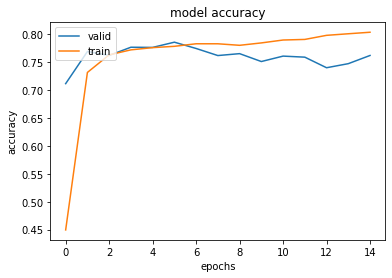

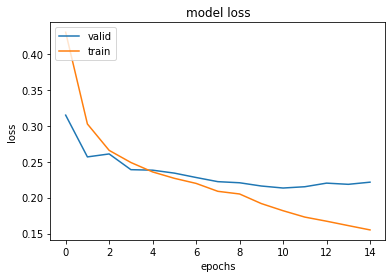

In [150]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['valid', 'train'], loc = 'upper left')
plt.show()
print('')
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['valid', 'train'], loc = 'upper left')
plt.show()

#Prediction on Test Data

In [126]:
tst = pd.read_csv('/content/test.csv')
print(tst.shape)
tst.head()

(8989, 3)


,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [127]:
er_1 = '\n'
TITLE = []
ABSTRACT = []
for i in range(len(tst)):
  TITLE.append(tst.iloc[i,1].replace(er_1, ' ')) 
  ABSTRACT.append(tst.iloc[i,2].replace(er_1, ' ')) 



In [128]:
tst['ABSTRACT'] = ABSTRACT
tst['TITLE'] = TITLE
tst.head()

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [129]:

title = []
abstract = []
for i in range(len(tst)):
  b = tst.iloc[i,1]
  c = tst.iloc[i,2]
  while b.find('$') != -1:
    n_1 = b.find('$')
    n_2 = b[n_1+1:].find('$')
    er_2 = b[n_1:n_1+n_2+2]
    b = b.replace(er_2,'')
  title.append(b)
  
  while c.find('$') != -1:
    n_1 = c.find('$')
    n_2 = c[n_1+1:].find('$')
    er_2 = c[n_1:n_1+n_2+2]
    c = c.replace(er_2,'')
  abstract.append(c)
tst['TITLE']=title
tst['ABSTRACT'] = abstract
tst.head()

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The -ESO Survey: the inner disk intermediate-a...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [130]:
for i in tst.iloc[:,1]:
  if type(i)==int:
    print(i)

In [142]:
tt_1 = t.texts_to_sequences(tst.iloc[:,1])
#print(tt_1)
pd_1 = pad_sequences(tt_1,449, padding='post')
#print(pd_1)
tt_2 = tt_1 = t.texts_to_sequences(tst.iloc[:,2])
#print(tt_1)
pd_2 = pad_sequences(tt_2,449, padding='post')

print(pd_2.shape, pd_1.shape)

(8989, 449) (8989, 449)


In [143]:
pd = np.array([pd_1.T,
                    pd_2.T])
pd = pd.T
pd.shape

(8989, 449, 2)

In [144]:
prd = model.predict(pd)

In [145]:
prd= prd[:,1,:]
prd.shape


(8989, 6)

In [146]:
prd[prd>=0.5] =1
prd[prd<0.5] = 0

In [147]:
import pandas as pd
prd = pd.DataFrame(list(prd))
prd

,0,1,2,3,4,5
0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
8984,1.0,0.0,0.0,0.0,0.0,0.0
8985,0.0,0.0,1.0,0.0,0.0,0.0
8986,1.0,0.0,0.0,0.0,0.0,0.0
8987,0.0,0.0,1.0,1.0,0.0,0.0


In [148]:
prd.to_csv('ans35.csv')